In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

import warnings
warnings.filterwarnings('ignore')

2.6.4


## Importing Data 


In [2]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')
ss = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
print(train.shape, test.shape,ss.shape)

(42000, 785) (28000, 784) (28000, 2)


## Data analysis

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [7]:
train.isna().any().sum()

0

In [8]:
train.isna().any().sum()

0

## 

In [9]:
X_train = train.drop('label',axis=1)
Y_train = train['label']
X_test = test

In [10]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()

In [11]:
X_train=X_train.reshape((len(X_train),28,28))
X_test=X_test.reshape((len(X_test),28,28))
print(X_train.shape, X_test.shape)

(42000, 28, 28) (28000, 28, 28)


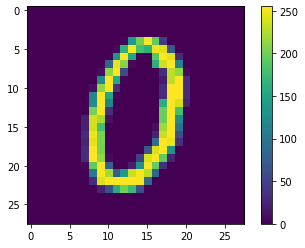

In [12]:
plt.figure()
plt.imshow(X_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
X_train, X_test=X_train/255.0, X_test/255.0

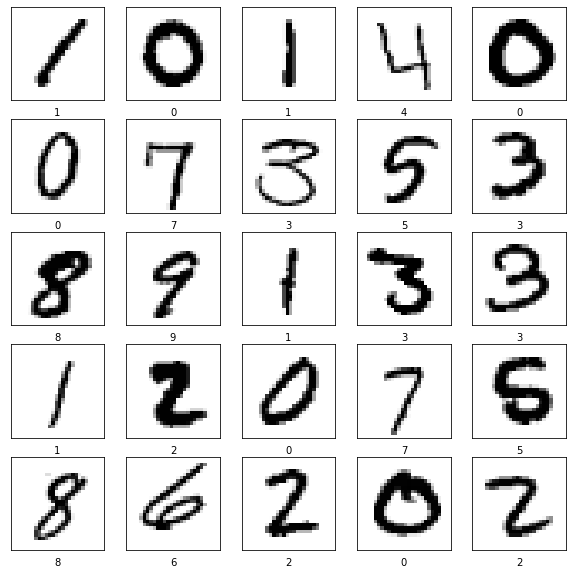

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(Y_train[i])
plt.show()

## Modeling

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2023-01-19 20:46:08.115526: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.fit(X_train, Y_train, epochs=10)

2023-01-19 20:46:08.546913: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2958 - accuracy: 0.9154
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1342 - accuracy: 0.9613
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0928 - accuracy: 0.9725
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0691 - accuracy: 0.9796
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0529 - accuracy: 0.9840
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0419 - accuracy: 0.9874
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0317 - accuracy: 0.9903
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0248 - accuracy: 0.9930
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0196 - accuracy: 0.9939
Epoch 10/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.016

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
Y_pred = probability_model.predict(X_test)

In [20]:
Y_pred

array([[1.8790854e-11, 5.8663025e-18, 1.0000000e+00, ..., 4.0325192e-09,
        1.9317613e-11, 5.6711404e-14],
       [1.0000000e+00, 6.5767174e-18, 6.3791183e-10, ..., 1.7384864e-11,
        2.4974665e-09, 6.6181998e-16],
       [5.8258637e-12, 6.4406240e-06, 7.0082001e-06, ..., 1.4643667e-05,
        7.4099073e-05, 9.9919873e-01],
       ...,
       [2.0466774e-13, 9.0006160e-13, 4.3770287e-10, ..., 2.3011630e-13,
        3.8878643e-08, 2.7112941e-07],
       [2.3229153e-11, 1.2297164e-14, 1.4431875e-10, ..., 1.1243271e-07,
        1.6061067e-09, 9.9785066e-01],
       [1.2204732e-13, 1.3961624e-14, 9.9999988e-01, ..., 3.9376796e-12,
        5.4188220e-11, 1.4039051e-12]], dtype=float32)

In [21]:
Y_pred=np.argmax(Y_pred,axis=1)

In [22]:
Y_pred

array([2, 0, 9, ..., 3, 9, 2])

In [23]:
Y_pred.shape

(28000,)

## Submission

In [24]:
output=pd.DataFrame({'ImageId':test.index+1,'Label':Y_pred})
output.to_csv('submission.csv',index=False)